In [14]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from helper import *
ndump = get_one_item(['field','diag',0,'ndump'])

## Calculate the Focusing force according to Benedetti 2017 paper

In [7]:
def H(q):
    if q < 0:
        print('The input cannot be negative!')
        return 
    if q == 0:
        return 1
    return (1 - np.exp(-q)) / q
# r and xi are numbers.
def Wr_benedetti(r,xi,sigma,M_over_m = 1836,nb0_over_n0 = 1000,Zi = 1):
    q = r ** 2 / (2 * sigma ** 2)
    return (r/2) * (1 + Zi * (nb0_over_n0 / 2 / M_over_m) * xi ** 2 * H(q))
# r is a number, xi is an array / xi is a number, r is an array
def Wr(r,xi,sigma,M_over_m = 1836,nb0_over_n0 = 1000,Zi = 1):
    if (type(r) == int or type(r) == float) and (type(xi) == list or type(xi) == np.ndarray):
        return np.array([Wr_benedetti(r,i,sigma,M_over_m,nb0_over_n0,Zi) for i in xi])
    elif (type(xi) == int or type(xi) == float) and (type(r) == list or type(r) == np.ndarray):
        return np.array([Wr_benedetti(i,xi,sigma,M_over_m,nb0_over_n0,Zi) for i in r])
    else:
        print('Wrong input type for r a xi')

# Plot transverse lineout of $F_r$

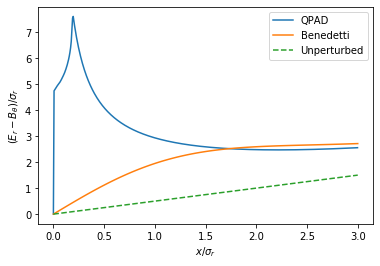

In [10]:
# benedetti prediction
sigma = 0.015
xi = 1.3
r = np.linspace(0,3 * sigma,100)
M_over_m = 1836
nb0_over_n0 = 8000
Zi = 1

Fr = Wr(r,xi,sigma,M_over_m,nb0_over_n0,Zi)

# QPAD simulation result
filename = '../Fields/Fr/Merged_angle_0/fr_'+str(ndump).zfill(8)+'.h5'
lineout_position = xi
x_simu, Fr_simu = get_lineout(filename,'transverse',lineout_position,'QPAD')
# select lineout range
x_simu, Fr_simu = select_lineout_range(x_simu, Fr_simu,0,3 * sigma)
# Plot them together to compare
plt.plot(x_simu/sigma, Fr_simu/sigma,label = 'QPAD')
plt.plot(r/sigma,Fr/sigma,label = 'Benedetti')
plt.plot(r/sigma,0.5*r/sigma,'--',label = 'Unperturbed')
plt.xlabel('$x / \sigma_r$')
plt.ylabel('$(E_r - B_{\\theta}) / \sigma_r$')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

# Plot longitudinal lineout of $F_r$

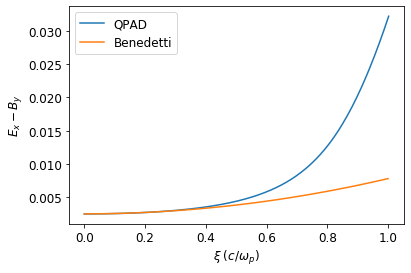

In [29]:
# benedetti prediction
r = 0.005
xi = np.linspace(0,1,100)
sigma = 0.015
M_over_m = 1836
nb0_over_n0 = 8000
Zi = 1

Fr = Wr(r,xi,sigma,M_over_m,nb0_over_n0,Zi)

# QPAD simulation result
filename = '../Fields/Fr/Merged_angle_0/fr_'+str(ndump).zfill(8)+'.h5'
lineout_position = r
xi_simu, Fr_simu = get_lineout(filename,'longitudinal',lineout_position,'QPAD')
# select lineout range
xi_simu, Fr_simu = select_lineout_range(xi_simu, Fr_simu,xi_simu[0],1)
# Plot them together to compare
plt.plot(xi_simu, Fr_simu,label = 'QPAD')
plt.plot(xi,Fr,label = 'Benedetti')
plt.xlabel('$\\xi \\;(c/\\omega_p)$')
plt.ylabel('$E_x - B_y$')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

# Plot transverse lineout of $\rho_i$

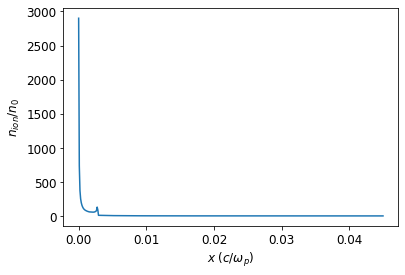

In [31]:
# Get lineout 
filename = '../Species1/Charge/Merged_angle_0/charge_'+str(ndump).zfill(8)+'.h5'
lineout_position = 1.3
x, ni = get_lineout(filename,'transverse',lineout_position,'QPAD')

# select visualization range
x_min = 0.0
x_max = 3 * sigma

x, ni = select_lineout_range(x, ni, x_min, x_max)

### Plot the data
plt.plot(x, ni)
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 12})
plt.show()

### Perform a linear regression
# x_inverse = 1 / x
# ni_pred = linear_regression(x_inverse,ni)
# plt.scatter(x_inverse,ni)
# plt.plot(x_inverse, ni_pred, color='red')
# plt.show()

# Plot longitudinal lineout of $\rho_i$

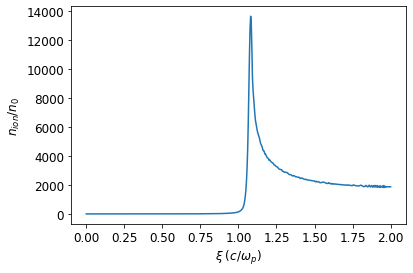

In [34]:
# Get lineout 
filename = '../Species1/Charge/Merged_angle_0/charge_'+str(ndump).zfill(8)+'.h5'
lineout_position = 0.0
xi, ni = get_lineout(filename,'longitudinal',lineout_position,'QPAD')

# select visualization range
xi, ni = select_lineout_range(xi, ni, xi[0], xi[-1])

### Plot the data
plt.plot(xi, ni)
plt.xlabel('$\\xi \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 12})
plt.show()